# Lab 3. Genetic Algorithms
This lab sheet aims to help us understand more about genetic algorithms, by studying 3 classic artificial intelligence problems.
So in this lab report, we will analyse three different tasks:
1. The travelling salesman problem
2. The 8-queens problem
3. The map colouring problem

Each one of these will be solved using genetic algorithms, which will be tested in terms of its performance, fitness function, genetic operators and crossover characteristics.

## Task 3.1 The Travelling Salesman Problem (TSP)
###Problem Description

This first task presents the problem of a salesman who needs to visit a number of N cities, from 1 to N. For this problem, we should presume that all the distances between the cities are already known. With this in mind, the objective is to calculate the best (optimal) route (city order) that the salesman should take, in order to get the minimum total distance travelled.

Let's now see an example.

![Figure 1](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-03%20163734.png?raw=true)

Figure 1

If we have 17 cities, the distances between each pair would be represented by the following array of values:

In [ ]:
TourSize = 17
distance_map = \
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]

For this example, the best path solution and respective total cost would be:

In [ ]:
OptTour = [0, 15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3],
OptDistance = 2085

Before proceeding to the testing section, we need to define 3 main factors of the genetic algorithms:
1. Encoding scheme: For each city a number from 0 to 16 will be assigned, these cities will then be presented in a permutation (array).
2. Fitness function: We need to check the total cost of distances between all the adjacent cities (that constitute the path), while always looking for a optimal solution (shortest route) and taking into account that the salesman will eventually return to its initial position, so the cost between the final and first position should also be considered.  
3. Genetic operators: There are 3 genetic operators we must acknowledge:
 1. Selection: tournament selection, as better solutions will then be used to create new ones. For example, the best solution out of 3.
 2. Crossover: We will choose a random place to swap the sub-strings between two
parents and by doing that, recombine their genetic information to create new solutions while keeping the validity of the strings. One way of doing this is, for example, by copying the initial sub-string (solution) from one parent and then completing the second part by following that order in the second parent. We could take the path solution of two parent individuals in a generation and swap cities between them to create new individuals with different path solutions.
 3. Mutation: In order to maintain a certain genetic diversity in the population, we can choose two random places and swap them. We could change two random cities in the path solution.

##Implementation and results
This section shows the implemented code and its respective output. We can also see the code responsible for the encoding scheme, fitness function and genetic operators.

In [ ]:
!pip install deap
import time
import array
import random
import numpy as np
from deap import algorithms, base, creator, tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
TourSize = 17
OptTour = [0, 15, 11, 8, 4, 1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3],
OptDistance = 2085
distance_map = \
    [[0, 633, 257, 91, 412, 150, 80, 134, 259, 505, 353, 324, 70, 211, 268, 246, 121],
    [633, 0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
    [257, 390, 0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191, 74, 53, 472, 142],
    [91, 661, 228, 0, 383, 120, 77, 105, 175, 476, 324, 240, 27, 182, 239, 237, 84],
    [412, 227, 169, 383, 0, 267, 351, 309, 338, 196, 61, 421, 346, 243, 199, 528, 297],
    [150, 488, 112, 120, 267, 0, 63, 34, 264, 360, 208, 329, 83, 105, 123, 364, 35],
    [80, 572, 196, 77, 351, 63, 0, 29, 232, 444, 292, 297, 47, 150, 207, 332, 29],
    [134, 530, 154, 105, 309, 34, 29, 0, 249, 402, 250, 314, 68, 108, 165, 349, 36],
    [259, 555, 372, 175, 338, 264, 232, 249, 0, 495, 352, 95, 189, 326, 383, 202, 236],
    [505, 289, 262, 476, 196, 360, 444, 402, 495, 0, 154, 578, 439, 336, 240, 685, 390],
    [353, 282, 110, 324, 61, 208, 292, 250, 352, 154, 0, 435, 287, 184, 140, 542, 238],
    [324, 638, 437, 240, 421, 329, 297, 314, 95, 578, 435, 0, 254, 391, 448, 157, 301],
    [70, 567, 191, 27, 346, 83, 47, 68, 189, 439, 287, 254, 0, 145, 202, 289, 55],
    [211, 466, 74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145, 0, 57, 426, 96],
    [268, 420, 53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202, 57, 0, 483, 153],
    [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483, 0, 336],
    [121, 518, 142, 84, 297, 35, 29, 36, 236, 390, 238, 301, 55, 96, 153, 336, 0]]

In [ ]:
# fitness function as the sum of all the distances between each consecutive cities in individual
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

# create creator.FitnessMin and creator.Individual to be used in the toolbox
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create the toolbox from the base
toolbox = base.Toolbox()

# add attribute generator to the toolbox
toolbox.register("indices", random.sample, range(TourSize), TourSize)

# initializers for individuals and population
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# genetic operators and fitness function
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
# toolbox.register("select", tools.selRoulette)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)


In [ ]:
random.seed(16)
pop = toolbox.population(n=500)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)

init_time = time.time()

algorithms.eaSimple(pop, toolbox, 0.7, 0.2, ngen=50, stats=stats)
#algorithms.eaSimple(pop, toolbox, 0.7, 0.2, ngen=50, stats=stats, verbose=False)

print("--- %s seconds ---" % (time.time() - init_time))

best = tools.selBest(pop, 1)[0]
print("Best: %s\nTotal Distance: %s" %(best.tolist(), best.fitness.values))

gen	nevals	min 
0  	500   	3369
1  	395   	3307
2  	384   	3261
3  	386   	3269
4  	402   	2938
5  	371   	2938
6  	372   	2697
7  	361   	2671
8  	388   	2671
9  	377   	2671
10 	391   	2487
11 	348   	2487
12 	379   	2487
13 	386   	2521
14 	357   	2521
15 	366   	2481
16 	358   	2481
17 	390   	2336
18 	376   	2457
19 	402   	2373
20 	366   	2373
21 	360   	2373
22 	375   	2278
23 	388   	2278
24 	385   	2199
25 	396   	2176
26 	367   	2176
27 	382   	2142
28 	368   	2175
29 	367   	2128
30 	366   	2115
31 	376   	2115
32 	389   	2088
33 	374   	2088
34 	381   	2088
35 	380   	2085
36 	377   	2085
37 	383   	2085
38 	380   	2085
39 	418   	2085
40 	380   	2085
41 	367   	2085
42 	352   	2085
43 	364   	2085
44 	388   	2085
45 	373   	2085
46 	393   	2085
47 	388   	2085
48 	377   	2085
49 	375   	2085
50 	379   	2085
--- 0.7595329284667969 seconds ---
Best: [1, 9, 10, 2, 14, 13, 16, 5, 7, 6, 12, 3, 0, 15, 11, 8, 4]
Total Distance: (2085.0,)


## Discussions
To solve this problem, it was used the DEAP (Distributed Evolutionary Algorithms in Python), as it provides all the necessary genetic algorithms and related functions to solve this task.

We can see some more examples in this github page https://github.com/DEAP/deap and the online documentation of the DEAP can be found at https://deap.readthedocs.io/en/master/api/index.html.

This table presents us the results outputted by the genetic algorithm, when using the esSimple() function in our newly implemented solution:

| Path cost | Runtime (seconds)| Number of generations |
|:-----------|:--------|:--------|
|     2085    |    0.75953| 50 |

###### table 1

By analysing the results above, we can see that when using the esSimple() function (part of our genetic algorithm), we get an optimal path, 1-9-10-2-14-13-16-5-7-6-12-3-0-15-11-8-4, with an associated total cost of 2085 and a runtime of 0.75953 seconds. When looking at the optimal solution provided at the beginning of this task, we can notice that even though the path, 0-15-11-8-4-1-9-10-2-14-13-16-5-7-6-12-3 is different from the optimal one we got, the path cost value is 2085, which is equal. Therefore, we can verify that our solution is indeed an optimal one and so our results can be considered correct.

## Task 3.2 The 8-Queens Problem
###Problem Description

This next task is a very well-known one, that consists of having an 8x8 chessboard in which we need to put 8 queens, but in a way that none of these queens can attack each other. For example, we can't have two or more queens on the same column, row or diagonal.

In the following figure, we can see one example of a solution (out of the existing 92) to this problem.

![Figure 2](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-03%20225147.png?raw=true)

Figure 2

We now need to design this genetic algorithm:
1. Encoding scheme: For each queen, there is a respective position on the board, so we will use a permutation from 0 to 7, in other words, an array of 8 elements (8 queens), where each index represents the row and the actual value of the elements represents the column, in which the queen is placed on the board. This is an optimal choice, as the genetic algorithm is just going to work towards enforcing the diagonal constraint (as both the row and column constraints are already satisfied by the permutations).
2. Fitness function: We need to check how good a solution really is. To do so we can calculate the number of queens threatening each other, so the lower this number is, the better the individual is. Notice that when this number is equal to 0, we got ourselves a solution to this problem. As the other constraints are already taken care of, we will just calculate the number of queens threatening each other on the diagonals of the board, so for this specific 8x8 board, we have 15 raising diagonals and 15 falling diagonals, which are 30 diagonals in total. Therefore, we can utilize two arrays (of length 15) in order to store how many threats there are, so for a queen placed at position (x,y), the falling diagonal index can be calculated by doing x+y, because this formula stays constant as these positions are all in the same (falling) diagonal. On the other hand, the raising diagonal index can be calculated by doing x-y+7, as the same principle applies, but we need to add 7 so we can keep the calculated index value within boundaries (range of 0 to 14).      
3. Genetic operators: We will take into account 3 different genetic operators:
 1. Selection: tournament selection, as better solutions will then be used to create other ones.
 2. Crossover: We will choose a random place to swap the sub-strings between two
parents and by doing that, recombine their genetic information to create new solutions, while keeping the validity of the strings. One way of doing this is, for example, by copying the initial sub-string (solution) from one parent and then complete the second part by following that order in the second parent. We could take the solution of two parent individuals in a generation and swap queen positions between them to create new individuals with different path solutions.
 3. Mutation: In order to maintain a certain genetic diversity in the population, like choosing two random places and swap them. We could change two random queen positions in the solution.

##Implementation and results
This section shows the implemented code and its respective output. We can also see the code responsable for the encoding scheme, fitness function and genetic operators.


In [ ]:
!pip install deap
import random, time
import numpy as np
from deap import algorithms, base, creator, tools


In [ ]:
NB_QUEENS = 12

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),


In [ ]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
init_time = time.time()
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
print("--- %s seconds ---" % (time.time() - init_time))
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

--- 0.6540398597717285 seconds ---
Best: [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5]. Fitness value: 0.0


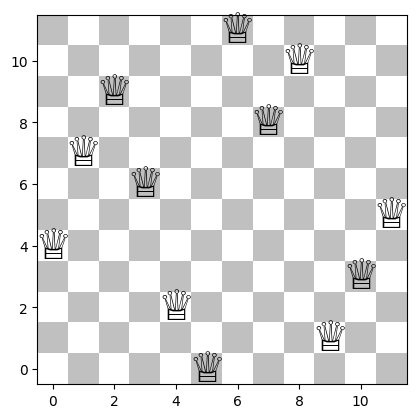

In [ ]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

## Discussions
To find a solution to this problem, again, it was used the DEAP (Distributed Evolutionary Algorithms in Python).

In the figure below, we can see an illustration of the solution generated when running the program.

![Figure 3](https://github.com/LeomPina/AIreports/blob/main/chess.png?raw=true)

Figure 3

By looking at the results obtained, when once again using the esSimple() function, we notice that we successfully found a solution to the "8-queens problem", as none of the resulting queens are attacking one another, while the best position layout discovered for the queens is 5-3-1-7-4-6-0-2. The fitness value of this solution is 0 (as no queen has a target), which is also an indicator that we were successful in finding a solution.

For the sake of further investigation, we also tested this algorithm for a number of 12 queens. This new solution can be seen in the figure below.

![Figure 4](https://github.com/LeomPina/AIreports/blob/main/chess%2012.png?raw=true)

Figure 4

As we can see the best solution found to this new problem is also accepted, as once again, none of the resulting queens are attacking each other. The best position layout discovered for the queens is 4-7-9-6-2-0-11-8-10-1-3-5 and the fitness value of this solution is also equal to 0.

## Task 3.3 The Map Colouring Problem
###Problem Description

This last task presents the "map colouring problem", in which we have a map that needs to be coloured. So the objective is to colour this map using as many colours as possible, but no adjacent areas can have the same colour.

For this problem, we used a generic algorithm in order to create a solution that can colour an entire map with a maximum number of only 4 colours (as in the "four colours theorem").

In the figure below we can see a map example of this problem.

![Figure 5](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-06%20011214.png?raw=true)

Figure 5

So in this example, we can see 11 different area names, that being, we can only use 4 colours to find a solution. In order to practically represent what is displayed in the map figure above, we can use an upper triangular matrix (array) that will contain the information about the adjency status for each area name concerning each other, so that value would be 0 if that certain area isn't adjacent and 1 otherwise. As an example, we could say that neighbours[0,1]=1 means Mark neighbouring Julia. We opted for this type of matrix instead of, for example, a full one, because the areas have reciprocal relationships when it comes to adjacency. We will also get a matrix in which its lower part is just zeros, this will also help us get rid of unnecessary data or redundancy and even save storage and other resources.

In [ ]:
neighbours =  [ [0,1,1,0,0,0,0,0,0,0,0],
                [0,0,1,1,1,0,1,0,0,0,0],
                [0,0,0,1,0,0,0,1,1,0,0],
                [0,0,0,0,0,1,1,0,1,0,0],
                [0,0,0,0,0,0,1,0,0,1,0],
                [0,0,0,0,0,0,1,0,1,1,1],
                [0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0]]

Let's now see the design of this genetic algorithm:
1. Encoding scheme: For representing the neighbourhood of each area, we will use an array with a size of 11 (as there are 11 names) that should represent the colour of each name, where the colours will be numbered from 0 to 3.
2. Fitness function: As we need to evaluate how good a solution is, we will calculate the number of adjacent areas that have the same colour, where the value 0 would indicate that we found a suitable solution for the problem, as there are 0 adjacent areas with the same colour.     
3. Genetic operators: We will take into account 3 different genetic operators:
 1. Selection: tournament selection, as better solutions will then be used to create other ones.
 2. Crossover: We will choose a random place to swap the sub-strings between two
parents and by doing that, recombine their genetic information to create new solutions while keeping the validity of the strings. One way of doing this is, for example, by copying the initial sub-string (solution) from one parent and then completing the second part by following that order in the second parent. We could take the (list) solution of two parent individuals in a generation and swap some of the colour positions between them to create new individuals with different colour solutions.
 3. Mutation: It would be beneficial to maintain a certain genetic diversity in the population, for that purpose, we could choose two random colour positions in the solution and swap them.

In [ ]:
!pip install deap
import array, time
import random
import numpy as np
from deap import creator, base, tools, algorithms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Specify the variables
numColour = 4
numNames = 11
colours = ('red', 'green', 'blue', 'gray')
names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian',
         'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly', 'Chris')

# Define the neighbours
neighbours =  [ [0,1,1,0,0,0,0,0,0,0,0],
                [0,0,1,1,1,0,1,0,0,0,0],
                [0,0,0,1,0,0,0,1,1,0,0],
                [0,0,0,0,0,1,1,0,1,0,0],
                [0,0,0,0,0,0,1,0,0,1,0],
                [0,0,0,0,0,0,1,0,1,1,1],
                [0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0]]


In [ ]:
def evalMapColouring(ind):
    val = 0
    for i in range(0, numNames):
      for j in range(0, numNames):
        if (neighbours[i][j] == 1) and (ind[i] == ind[j]):
            val += 1
    return val,

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_colour", random.randint, 0, numColour-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_colour, numNames)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalMapColouring)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numColour-1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
pop = toolbox.population(n=10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
init_time = time.time()
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.4, ngen=100,
                              stats=stats, verbose=True)
print("--- %s seconds ---" % (time.time() - init_time))

best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness: %s." %(best.tolist(), evalMapColouring(best)[0]))
for i in range(numNames):
  print("%s ==> %s" %(names[i], colours[best[i]]))

gen	nevals	min
0  	10    	3  
1  	8     	4  
2  	9     	4  
3  	6     	2  
4  	8     	2  
5  	8     	2  
6  	8     	2  
7  	10    	2  
8  	10    	2  
9  	7     	2  
10 	8     	2  
11 	8     	2  
12 	10    	2  
13 	10    	1  
14 	8     	1  
15 	10    	1  
16 	10    	1  
17 	10    	1  
18 	10    	1  
19 	9     	0  
20 	10    	0  
21 	8     	0  
22 	9     	0  
23 	10    	0  
24 	9     	0  
25 	7     	0  
26 	8     	0  
27 	10    	0  
28 	8     	0  
29 	10    	0  
30 	8     	0  
31 	8     	0  
32 	10    	0  
33 	9     	0  
34 	7     	0  
35 	9     	0  
36 	8     	0  
37 	4     	0  
38 	8     	0  
39 	7     	0  
40 	8     	0  
41 	10    	0  
42 	9     	0  
43 	8     	0  
44 	9     	0  
45 	8     	0  
46 	9     	0  
47 	8     	0  
48 	10    	0  
49 	10    	0  
50 	8     	0  
51 	10    	0  
52 	10    	0  
53 	8     	0  
54 	10    	0  
55 	6     	0  
56 	9     	0  
57 	5     	0  
58 	8     	0  
59 	7     	0  
60 	7     	0  
61 	10    	0  
62 	10    	0  
63 	8     	0  
64 	8     	0  
65 	8     

## Discussions
To solve this problem, once more it was used the DEAP (Distributed Evolutionary Algorithms in Python).

In the figure below, we can see an illustrated example of one possible solution generated by this algorithm. Notice that each run can give a different but also acceptable solution.

![Figure 6](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-06%20165609.png?raw=true)

Figure 6

So some possible output examples could be, such as 1-3-0-2-2-1-0-2-3-3-2, 2-0-3-2-3-3-1-1-0-0-2, or for example, 3-1-2-3-3-2-0-3-1-1-3, all these are presented with a fitness value of 0.

By analysing the solutions previously mentioned, we can notice that none of the area names has the same colour as an adjacent one, also the fitness value is 0, which also means that we got an optimal solution. Therefore, we can assume that this algorithm revealed itself successful in finding a solution to this task.

#Conclusion

In conclusion, after completing this Lab work by solving its tasks and problems, we can agree that by using the DEAP, we were able to find an optimal solution for these 3 tasks. By doing so, we also studied these 3 classic problems and therefore gained the skills to design genetic algorithms to solve these kinds of problem, as well to build the encoding scheme, fitness function and genetic operators.

In further investigations, we could use other and even more complex algorithms and data structures, as well as try to solve more advanced problems which would require better fitness functions and more evolved algorithmic genetic designs, which could also mean many more generations, individuals and solutions. Furthermore, we could also try to apply this knowledge to real-world applications or other areas of investigation.